In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 

In [2]:
df = pd.read_csv('kc_house_data.csv')

Data preprocessing

In [3]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.isnull().sum().sum()


0

Data visualization

(0.0, 8081250.0)

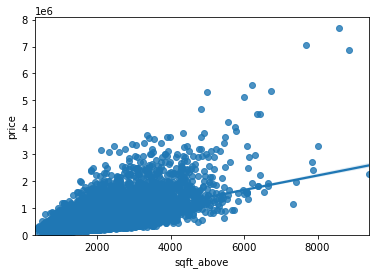

In [7]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)

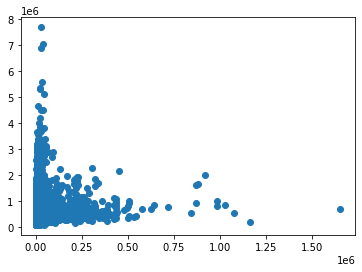

In [8]:
plt.scatter(x="sqft_lot", y="price", data=df)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

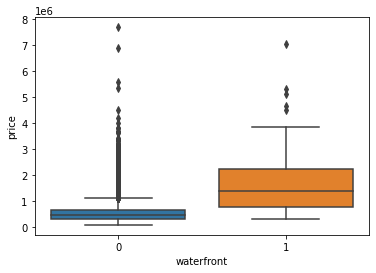

In [9]:
sns.boxplot(x="waterfront", y="price", data=df)

<AxesSubplot:xlabel='floors', ylabel='price'>

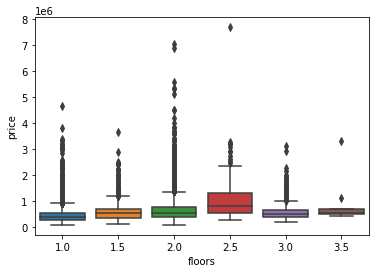

In [10]:
sns.boxplot(x="floors", y="price", data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

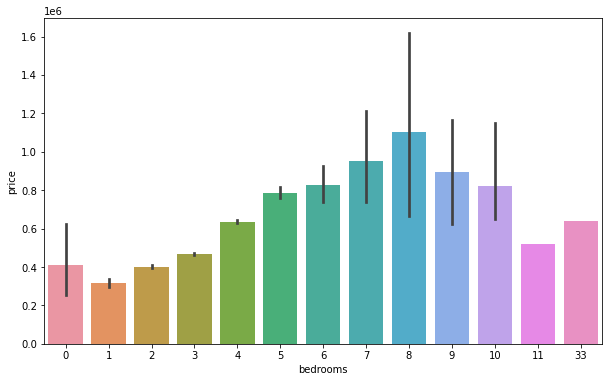

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'bedrooms', y = 'price', data = df)

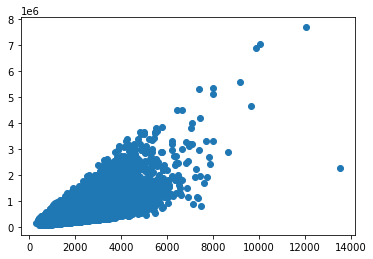

In [12]:
plt.scatter(x="sqft_living", y="price", data=df)

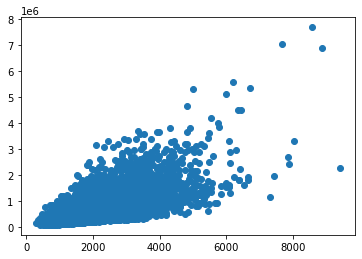

In [13]:
plt.scatter(x="sqft_above", y="price", data=df)

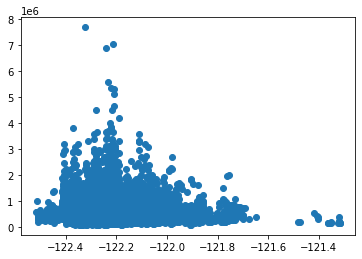

In [14]:
plt.scatter(x="long", y="price", data=df)

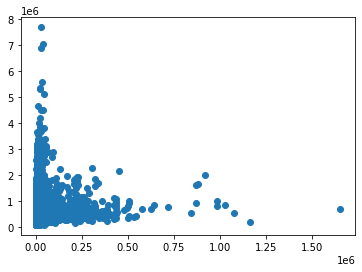

In [15]:
plt.scatter(x="sqft_lot", y="price", data=df)

<AxesSubplot:xlabel='grade', ylabel='price'>

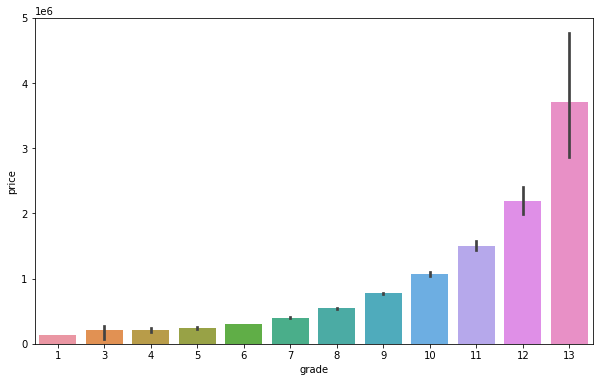

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'grade', y = 'price', data = df)

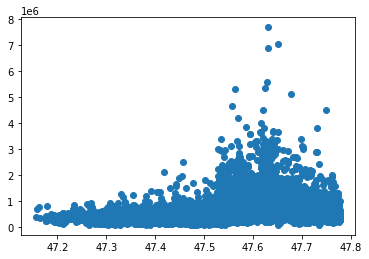

In [17]:
plt.scatter(x="lat", y="price", data=df)

<AxesSubplot:>

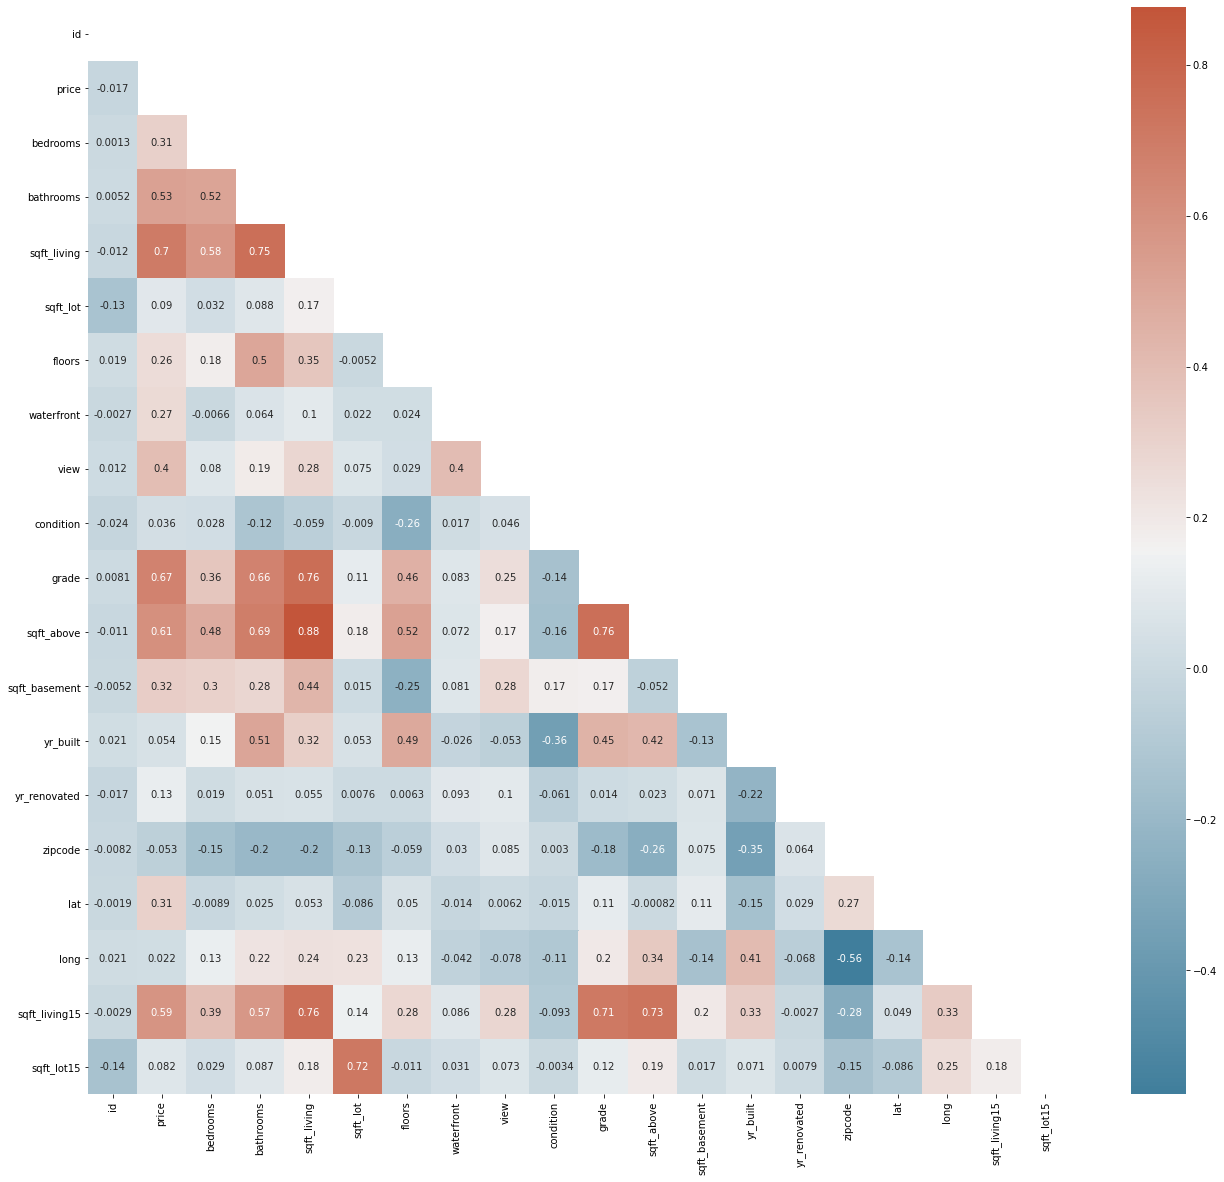

In [18]:
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(22, 20))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

the most important features are sqft_living sqft_above grade (they have a good correlation with the price >0.5)

Splitting data

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df[['sqft_living']], df['price'], test_size=0.20, random_state=1)

Linear regression

In [27]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

Plot model

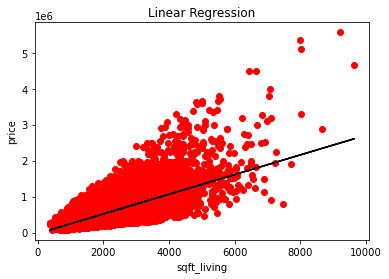

In [31]:
plt.scatter(x_train,y_train,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x_train,lr.predict(x_train),color="k")
plt.show()

Test

In [36]:
predicted=lr.predict(x_test) 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
lr.score(x_test, y_test)

MSE 85730574276.16481
R squared 0.5033019006466926


0.5033019006466926

Multi-linear regression

In [46]:
x_train, x_test, y_train, y_test = train_test_split(df[["sqft_above","grade","sqft_living","sqft_living15","view"]], df['price'], test_size=0.20, random_state=1)


In [47]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [48]:
mlr.score(x_test, y_test)

0.5760043321215923

When i use a multi-linear regression model (0.57) i get more accuracy than a simple linear regression (0.50)

Ploynomial regression

In [56]:
x_train, x_test, y_train, y_test = train_test_split(df[["sqft_above","grade","sqft_living","sqft_living15","view"]], df['price'], test_size=0.20, random_state=1)
plr = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_=poly.fit_transform(x_train)
plr.fit(x_, y_train) 

LinearRegression()

In [57]:
x_test_=poly.fit_transform(x_test)
plr.score(x_test_, y_test)

0.6672207948601168

When i use a polynomial linear regression model (0.66) i get more accuracy than a simple linear regression (0.50) and a smulti-linear regression (0.57)